In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data into a DataFrame
data = pd.read_excel("data/185 clinical data_Updated 10_01_23.xlsx").drop(['Srl',"tcga_participant_barcode"], axis=1)
data.head()

,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_pathologic_stage,CLI_pathology_T_stage,CLI_pathology_N_stage,CLI_pathology_M_stage,CLI_gender,CLI_radiation_therapy,CLI_histological_type,CLI_residual_tumor,CLI_number_of_lymph_nodes,CLI_race
0,65,1,66.0,NaN,IV,t3,n1,m0,male,no,pancreas-adenocarcinoma-other subtype,r0,7.0,white
1,48,0,NaN,729.0,IV,t2,n1,m0,male,no,pancreas-adenocarcinoma-other subtype,r0,0.0,white
2,75,1,293.0,NaN,III,t3,n0,m0,male,no,pancreas-adenocarcinoma ductal type,r0,0.0,white
3,71,0,NaN,80.0,IV,t3,n1,m0,male,NaN,pancreas-adenocarcinoma ductal type,r1,3.0,white
4,70,1,627.0,NaN,IV,t3,n1,m0,female,yes,pancreas-adenocarcinoma ductal type,r0,6.0,white


In [2]:
data.fillna(0)

,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_pathologic_stage,CLI_pathology_T_stage,CLI_pathology_N_stage,CLI_pathology_M_stage,CLI_gender,CLI_radiation_therapy,CLI_histological_type,CLI_residual_tumor,CLI_number_of_lymph_nodes,CLI_race
0,65,1,66.0,0.0,IV,t3,n1,m0,male,no,pancreas-adenocarcinoma-other subtype,r0,7.0,white
1,48,0,0.0,729.0,IV,t2,n1,m0,male,no,pancreas-adenocarcinoma-other subtype,r0,0.0,white
2,75,1,293.0,0.0,III,t3,n0,m0,male,no,pancreas-adenocarcinoma ductal type,r0,0.0,white
3,71,0,0.0,80.0,IV,t3,n1,m0,male,0,pancreas-adenocarcinoma ductal type,r1,3.0,white
4,70,1,627.0,0.0,IV,t3,n1,m0,female,yes,pancreas-adenocarcinoma ductal type,r0,6.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,67,0,0.0,951.0,II,t2,n0,m0,male,yes,pancreas-adenocarcinoma ductal type,r1,0.0,white
178,53,0,0.0,720.0,II,t2,n0,m0,female,yes,pancreas-adenocarcinoma-other subtype,r1,0.0,white
179,59,0,0.0,350.0,IV,t3,n1,mx,male,yes,pancreas-adenocarcinoma ductal type,r0,4.0,white
180,61,0,0.0,2016.0,IV,t3,n1,mx,female,yes,pancreas-adenocarcinoma ductal type,r0,2.0,white


In [3]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
# data["tcga_participant_barcode"] = ord_enc.fit_transform(data[["tcga_participant_barcode"]])
data["CLI_pathologic_stage"] = ord_enc.fit_transform(data[["CLI_pathologic_stage"]])
data["CLI_pathology_T_stage"] = ord_enc.fit_transform(data[["CLI_pathology_T_stage"]])
data["CLI_pathology_N_stage"] = ord_enc.fit_transform(data[["CLI_pathology_N_stage"]])
data["CLI_pathology_M_stage"] = ord_enc.fit_transform(data[["CLI_pathology_M_stage"]])
data["CLI_gender"] = ord_enc.fit_transform(data[["CLI_gender"]])
data["CLI_radiation_therapy"] = ord_enc.fit_transform(data[["CLI_radiation_therapy"]])
data["CLI_histological_type"] = ord_enc.fit_transform(data[["CLI_histological_type"]])
data["CLI_residual_tumor"] = ord_enc.fit_transform(data[["CLI_residual_tumor"]])
data["CLI_race"] = ord_enc.fit_transform(data[["CLI_race"]])

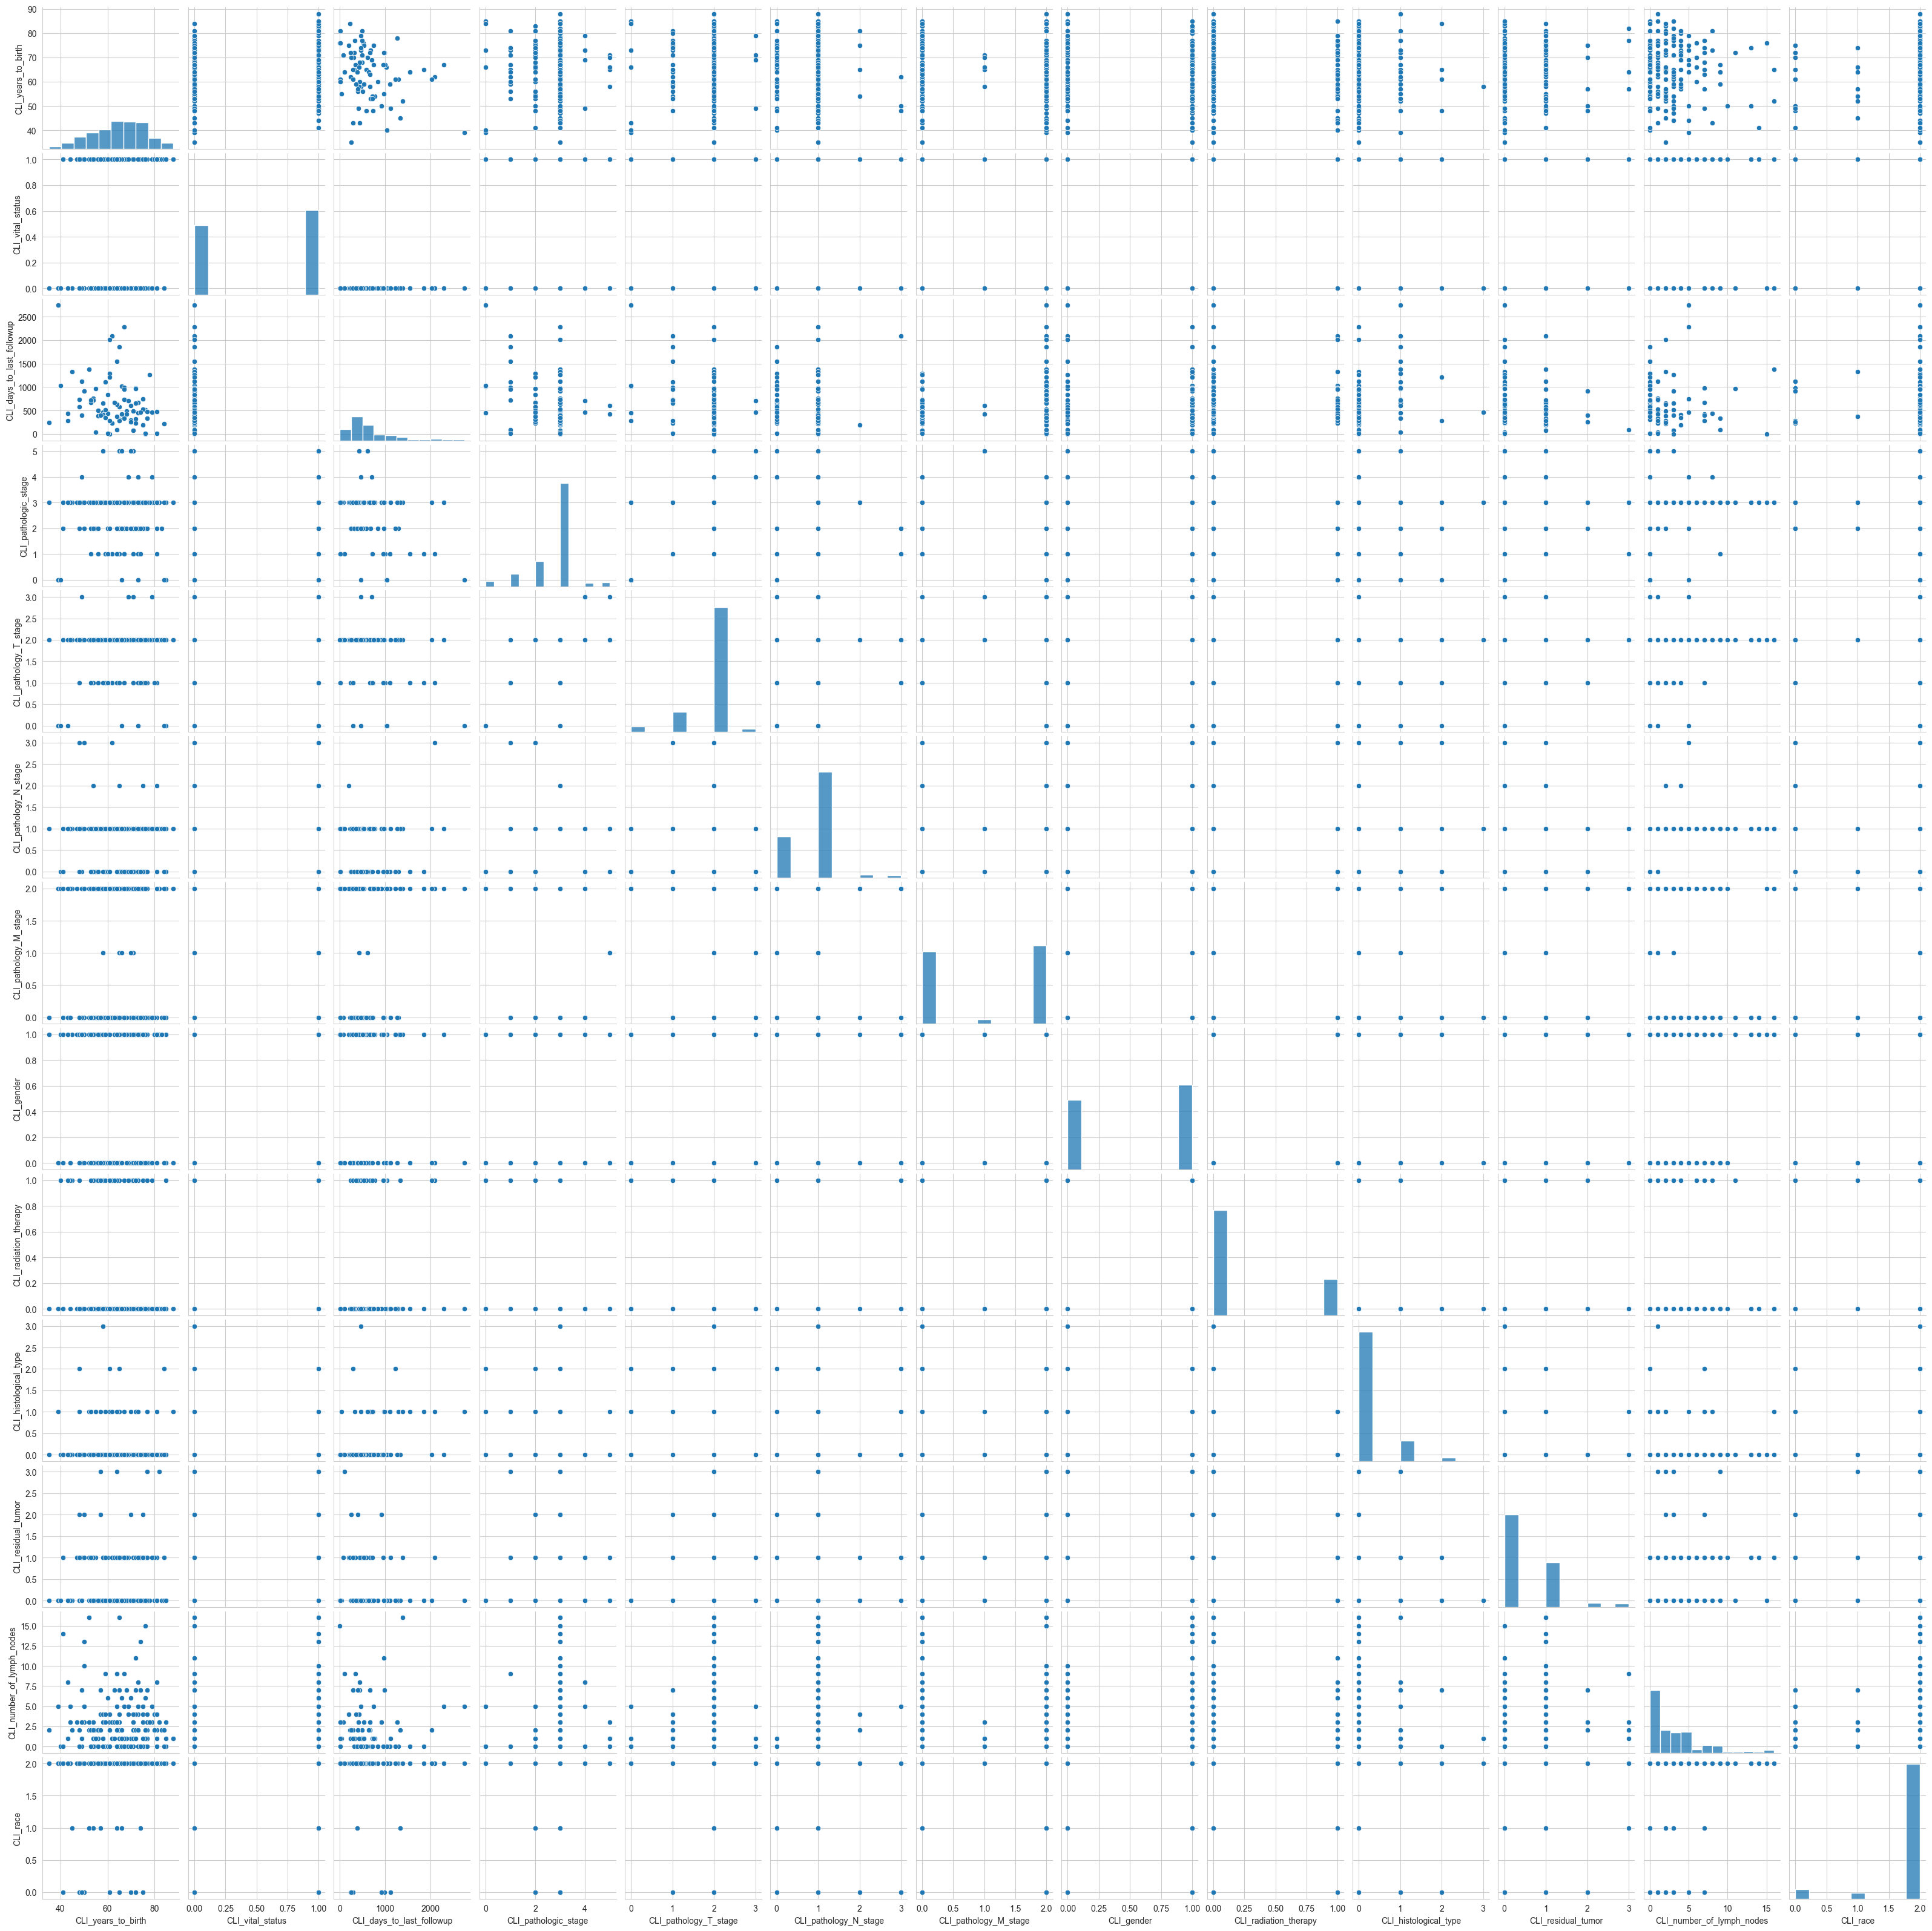

In [4]:
import seaborn
seaborn.pairplot(data.drop('CLI_days_to_death', axis = 1))

<Axes: >

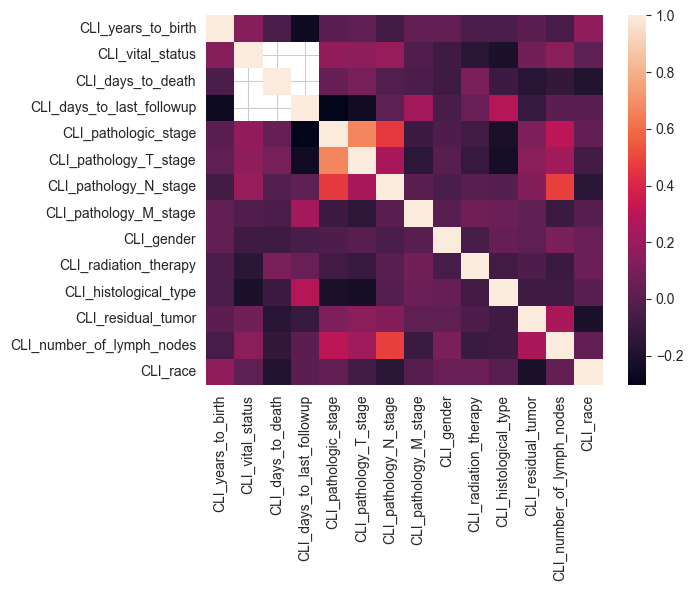

In [5]:
seaborn.heatmap(data.corr(),
                xticklabels=data.columns,
                yticklabels=data.columns)

In [6]:
X = data.drop(['CLI_days_to_death'], axis = 1).fillna(0)
y = data['CLI_days_to_death'].fillna(0)
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

In [7]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

In [8]:
clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [9]:
preds = clf.predict(testing)

In [10]:
clf.score(training, training_labels)

0.9926470588235294

In [11]:
clf.score(testing, testing_labels)*2.5

0.9239130434782608

In [12]:
preds

array([ 143.,  607.,    0.,    0.,    0.,  607.,  267.,  293.,  607.,
        381.,  143.,    0.,  394.,    0.,    0.,  183.,  293.,  460.,
        738.,    0.,    0.,   95.,    0.,    0.,    0.,  603., 2182.,
        230.,    0.,  460.,  511.,  250.,  458.,  393.,  365.,    0.,
          0.,  224.,  517.,    0.,    0.,    0.,  236.,  250.,  460.,
        486.])

In [13]:
len(preds)

46

In [14]:
X = data.drop(['CLI_days_to_death'], axis = 1).fillna(0)
y = data['CLI_days_to_death'].fillna(0)
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42)

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(training_labels)
y_onehot_test = label_binarizer.transform(training_labels)
y_onehot_test  # (n_samples, n_classes)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [17]:
y_score = clf.fit(training, training_labels).predict_proba(testing)

In [18]:
y_score

array([[0.01, 0.08, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , ..., 0.02, 0.02, 0.  ],
       [0.97, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.06, 0.01, 0.  , ..., 0.07, 0.  , 0.02],
       [0.94, 0.  , 0.  , ..., 0.01, 0.  , 0.  ]])

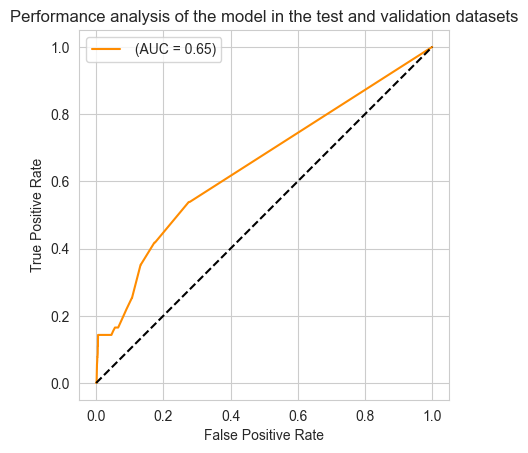

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name=f"",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Performance analysis of the model in the test and validation datasets")
plt.legend()
plt.show()